# 1.导入库

In [1]:
import pandas as pd
import numpy as np

# 2.创建Series取索引

Series对象有loc和iloc成员变量，如下图所示：

loc的数据类型为pandas.core.indexing,_LocIndexer，

iloc的数据类型为pandas.core.indexing,_iLocIndexer，

用loc进行索引时，中括号[ ]中的值必须是索引的真实值；

用iloc进行索引时，中括号[ ]中的值必须是整数，与列表list索引取值类似，例如obj.iloc[2]就是取第3行的值。


In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
obj = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj

d    4
b    7
a   -5
c    3
dtype: int64

In [4]:
obj.loc

In [5]:
obj.loc['b']

7

In [6]:
obj.iloc

In [7]:
obj.iloc[2]

-5

In [8]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [9]:
obj.index

Index(['d', 'b', 'a', 'c'], dtype='object')

将Series看成一个定长的有序字典， 因为它是索引值到数值的一个映射

In [10]:
'b' in obj

True

In [11]:
'e' in obj

False

如果数据被存放在一个 Python 字典中，也可以直接通过这个字典来创建Series：

In [13]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000,'Utah': 5000}

In [15]:
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [16]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [18]:
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

使用缺失（missing）或 NA 表示缺失数据。pandas 的 isnull 和 notnull函数可用于检测缺失数据

In [19]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [20]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [21]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series 对象本身及其索引都有一个 name 属性，该属性跟 pandas 其他的关键功能关系非常密切

In [25]:
obj4.name = '人口'

In [26]:
obj4.index.name = 'state'

In [27]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: 人口, dtype: float64

In [28]:
obj

d    4
b    7
a   -5
c    3
dtype: int64

In [29]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# 3.Pandas基本数据类型-DataFrame

DataFrame 是一个表格型的数据结构,它含有一组有序的列，每列可以是不同的值类型 。

Dataframe既有行索引也有列索引,它可以被看做由 Series组成的字典(共用同一个索引)。

跟其他类似的数据结构相比(如R的dataframe), Data frame中面向行和面向列的操作基本上是平衡的。

其实, Dataframe中的数据是以一个或多个二维块存放的(而不是列表、字典或别的一维数据结构)。


## 3.1 可以用于构造DataFrame的数据
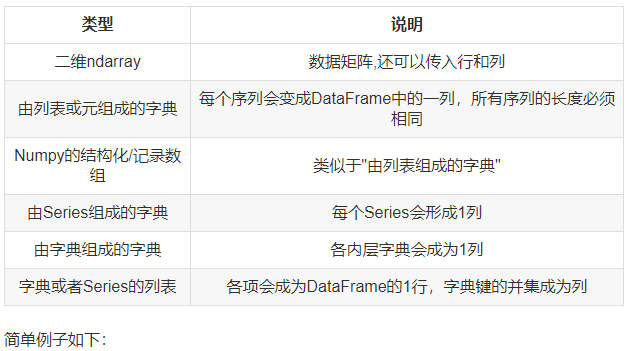

In [30]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Neveda'],
       'year':[2000, 2000, 2002, 2001, 2002],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2000,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Neveda,2002,2.9


### 查看数据
#### 头尾数据

head 和 tail 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [31]:
# 头3行
df.head(3)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2000,1.7
2,Ohio,2002,3.6


In [32]:
# 最后 3 行：
df.tail(3)

,state,year,pop
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Neveda,2002,2.9


## 3.2 读取DataFrame中的数据
有两种方式读取数据：

通过类似字典键索引的方式：

In [33]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Neveda'],
       'year':[2000, 2000, 2002, 2001, 2002],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns=['year', 'state', 'pop'])
year = df['year']
year

0    2000
1    2000
2    2002
3    2001
4    2002
Name: year, dtype: int64

In [34]:
df

,year,state,pop
0,2000,Ohio,1.5
1,2000,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Neveda,2.9


2.通过属性的方式：

In [35]:
df = pd.DataFrame(data, columns=['year', 'state', 'pop'])
df.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Neveda
Name: state, dtype: object

In [36]:
df

,year,state,pop
0,2000,Ohio,1.5
1,2000,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Neveda,2.9


## 3.3 DataFrame增加列

In [37]:
# 给“财务”列赋值一个标量
data = {'地区':['北京', '上海', '广州', '天津', '重庆'],
       '年份':[2000, 2000, 2002, 2001, 2002],
       '人口':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns=data.keys())
df['财务'] = 17
df

,地区,年份,人口,财务
0,北京,2000,1.5,17
1,上海,2000,1.7,17
2,广州,2002,3.6,17
3,天津,2001,2.4,17
4,重庆,2002,2.9,17


In [13]:
# 给“财务”列赋值一组值
data = {'地区':['北京', '上海', '广州', '天津', '重庆'],
       '年份':[2000, 2000, 2002, 2001, 2002],
       '人口':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns=data.keys())
df['财务'] = range(5)
df


,地区,年份,人口,财务
0,北京,2000,1.5,0
1,上海,2000,1.7,1
2,广州,2002,3.6,2
3,天津,2001,2.4,3
4,重庆,2002,2.9,4


In [39]:
df.iloc[2]

地区      广州
年份    2002
人口     3.6
财务      17
Name: 2, dtype: object

In [40]:
data = {'地区':['北京', '上海', '广州', '天津', '重庆'],
       '年份':[2000, 2000, 2002, 2001, 2002],
       '人口':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns=data.keys())
df['地区_上海'] = df.地区 == '上海'
df

,地区,年份,人口,地区_上海
0,北京,2000,1.5,False
1,上海,2000,1.7,True
2,广州,2002,3.6,False
3,天津,2001,2.4,False
4,重庆,2002,2.9,False


In [41]:
df.columns

Index(['地区', '年份', '人口', '地区_上海'], dtype='object')

In [42]:
df.index

RangeIndex(start=0, stop=5, step=1)

## 3.4 DataFrame删除列
删除"地区_上海"列：del df['地区_上海']

In [43]:
del df['地区_上海']
df

,地区,年份,人口
0,北京,2000,1.5
1,上海,2000,1.7
2,广州,2002,3.6
3,天津,2001,2.4
4,重庆,2002,2.9


## 3.5 DataFrame转置

In [44]:
data = {'地区':['北京', '上海', '广州', '天津', '重庆'],
       '年份':[2000, 2000, 2002, 2001, 2002],
       '人口':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns=data.keys())
df.T

,0,1,2,3,4
地区,北京,上海,广州,天津,重庆
年份,2000,2000,2002,2001,2002
人口,1.5,1.7,3.6,2.4,2.9


## 3.6 DataFrame取值

In [45]:
data = {'地区':['北京', '上海', '广州', '天津', '重庆'],
       '年份':[2000, 2000, 2002, 2001, 2002],
       '人口':[1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns=data.keys())
df.values

array([['北京', 2000, 1.5],
       ['上海', 2000, 1.7],
       ['广州', 2002, 3.6],
       ['天津', 2001, 2.4],
       ['重庆', 2002, 2.9]], dtype=object)

# 4.Pandas快速进阶
## 4.1 DataFrame创建
创建行和列都为自定义值的DataFrame

In [46]:
kwargs = dict(
    index = ['上海','北京','广州','天津'],
    columns = ['one', 'two', 'three', 'four']
)
df = pd.DataFrame(np.arange(16).reshape(4,4), **kwargs)
df

,one,two,three,four
上海,0,1,2,3
北京,4,5,6,7
广州,8,9,10,11
天津,12,13,14,15


In [47]:
df.index.name = 'city'
df.columns.name = 'num'
df

num,one,two,three,four
city,,,,
上海,0,1,2,3
北京,4,5,6,7
广州,8,9,10,11
天津,12,13,14,15


In [48]:
index = ['上海','北京','广州','天津']
columns = ['one', 'two', 'three', 'four']
df = pd.DataFrame(np.arange(16).reshape(4,4), index=index, columns=columns)
df

,one,two,three,four
上海,0,1,2,3
北京,4,5,6,7
广州,8,9,10,11
天津,12,13,14,15


## 4.2 DataFrame删除多行

In [49]:
index = ['上海','北京','广州','天津']
columns = ['one', 'two', 'three', 'four']
df = pd.DataFrame(np.arange(16).reshape(4,4), index=index, columns=columns)
df = df.drop(['上海', '北京'])
df

,one,two,three,four
广州,8,9,10,11
天津,12,13,14,15


## 4.3 DataFrame删除多列

In [50]:
index = ['上海','北京','广州','天津']
columns = ['one', 'two', 'three', 'four']
df = pd.DataFrame(np.arange(16).reshape(4,4), index=index, columns=columns)
df = df.drop(['one', 'two'], axis=1)   # 需标明列
df

,three,four
上海,2,3
北京,6,7
广州,10,11
天津,14,15


## 4.4 DataFrame选出多行
选出第2、 3行，即选出索引为1、2的行，代码如下：

注意，df.iloc 不是方法，是类似于列表list的可迭代对象，所以后面必须接中括号[ ]

In [51]:
index = ['上海','北京','广州','天津']
columns = ['one', 'two', 'three', 'four']
df = pd.DataFrame(np.arange(16).reshape(4,4), index=index, columns=columns)
df.iloc[[1, 2]]

,one,two,three,four
北京,4,5,6,7
广州,8,9,10,11


In [52]:
df.iloc[[1]]    # 索引一行

,one,two,three,four
北京,4,5,6,7


In [53]:
df.iloc[1]    # 与Series类似， 索引号为1的行

one      4
two      5
three    6
four     7
Name: 北京, dtype: int32

## 4.5 DataFrame选出多列
选出第2、 3列，即选出索引为1、 2的列，代码如下：

In [54]:
kwargs = dict(
    index = ['上海','北京','广州','天津'],
    columns = ['one', 'two', 'three', 'four']
)
df = pd.DataFrame(np.arange(16).reshape(4,4), **kwargs)
df[['two', 'three']]

,two,three
上海,1,2
北京,5,6
广州,9,10
天津,13,14


In [55]:
# 在不知道列名的情况下实现：
index = ['上海','北京','广州','天津']
columns = ['one', 'two', 'three', 'four']
df = pd.DataFrame(np.arange(16).reshape(4, 4), index=index, columns=columns)
df[df.columns[1:3]]

,two,three
上海,1,2
北京,5,6
广州,9,10
天津,13,14


# 练习
### Step 1. 导入相应的模块

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. 给定的原始数据集

In [57]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 3. 根据原始数据集创建一个DataFrame，并赋值给变量army

In [58]:
army = pd.DataFrame(raw_data, columns=raw_data.keys())
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


### Step 4. 设置给定数据中的origin字段为DataFrame的列名，即columns的值，结果如下所示

In [59]:
army.index = army['origin']

# 或 army.index = army.origin
del army['origin']
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2


### Step 5. 打印列名为veterans的所有值，效果如下:

In [60]:
army['veterans']

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

### Step 6. 打印列名为 'veterans' 和 'deaths' 的所有数据

In [61]:
army[['veterans', 'deaths']]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


### Step 7. 打印出所有的列索引的值

In [62]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

In [63]:
army.columns[3:5]

Index(['battles', 'size'], dtype='object')

### Step 8. 筛选出列 regiments 的值不为"Dragoons"的所有数据，如下所示
方法一：

In [64]:
army.iloc[army['regiment'].values != 'Dragoons']

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [70]:
# 方法二：
army[army['regiment'] != 'Dragoons']

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [71]:
# 筛选出如下所示的数据， 即第3到7行，第3到6列的所有数据

army.iloc[range(3,8)][army.columns[3:7]]

,battles,size,veterans,readiness
origin,,,,
Florida,2,1400,26,3
Maine,4,1592,73,2
Iowa,7,1006,37,1
Alaska,8,987,949,2
Washington,3,849,48,3


In [72]:
army.iloc[3:8, 3:7]

,battles,size,veterans,readiness
origin,,,,
Florida,2,1400,26,3
Maine,4,1592,73,2
Iowa,7,1006,37,1
Alaska,8,987,949,2
Washington,3,849,48,3


In [73]:
# 索引不连续的部分：
army.iloc[[1, 3, 4], [3, 4, 5]]

,battles,size,veterans
origin,,,
California,42,957,5
Florida,2,1400,26
Maine,4,1592,73
